In [1]:
import os
import pandas as pd
import numpy as np
import math
import numpy.random as nr
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)


In [4]:
"""Guidelines

You need to produce an R or Python notebook that builds a classifier from the given dataset. Please provide explanations of each step of the process, from data exploration to the final model evaluation.


Data Cleaning and Preparation: In this case the data is relatively clean, but you may still need some preprocessing, such as scaling.
Model Selection: Train at least two models on the dataset. Clearly indicate which metrics you used and the performance of each model. Be sure to address any imbalance in the data, as well as using an appropriate train/test data split.
Performance Optimization: Use regularization, hyperparameter tuning, or other techniques to further optimize your chosen model and/or help select the best model.

At the end of your notebook, provide a brief summary (one paragraph) of your model – what it is, what preprocessing and optimization you did, and the final accuracy (or another appropriate metric)."""

"""Data Description-
age:   numeric
job:   type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
marital:     marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
default:    has credit in default? (categorical: 'no','yes','unknown')
housing:    has housing loan? (categorical: 'no','yes','unknown')
loan:       has personal loan? (categorical: 'no','yes','unknown')
contact:    contact communication type (categorical: 'cellular','telephone')
month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
day_of_week:        last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
duration:           last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
campaign:           number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays:              number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous:           number of contacts performed before this campaign and for this client (numeric)
poutcome:           outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
)"""


"Data Description-\nage:   numeric\njob:   type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\nmarital:     marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\neducation: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\ndefault:    has credit in default? (categorical: 'no','yes','unknown')\nhousing:    has housing loan? (categorical: 'no','yes','unknown')\nloan:       has personal loan? (categorical: 'no','yes','unknown')\ncontact:    contact communication type (categorical: 'cellular','telephone')\nmonth: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\nday_of_week:        last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\nduration:           last contact duration, in s

In [5]:
%matplotlib inline


In [6]:
#Load Data

csvexcel = '/Users/joaqu/Documents/Bootcamp/bank-full.csv'
dataset = pd.read_csv(csvexcel, sep=';')


In [7]:
#Exploratory Data

dataset.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
dataset.shape


(45211, 17)

In [9]:
dataset.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [10]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
dataset.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [12]:
dataset.rename(columns = {'y':'deposit'}, inplace =True)


In [13]:
for col in dataset.select_dtypes(include='object').columns:
    print(col)
    print(dataset[col].unique())


job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


In [14]:
data_dup = dataset[dataset.duplicated(keep="last")]
data_dup.shape


(0, 17)

In [15]:
#Analyze and Visualize Data

print(dataset["deposit"].value_counts())


no     39922
yes     5289
Name: deposit, dtype: int64


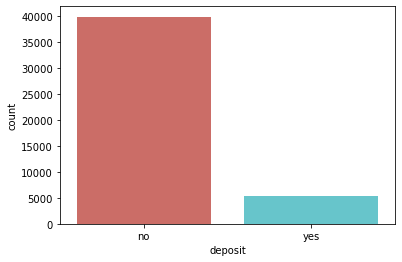

In [16]:
sns.countplot(x='deposit',data=dataset,palette='hls')
plt.show()


In [17]:
####Find Categorical Feature Distribution


In [18]:
categorical_features=[feature for feature in dataset.columns if ((dataset[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

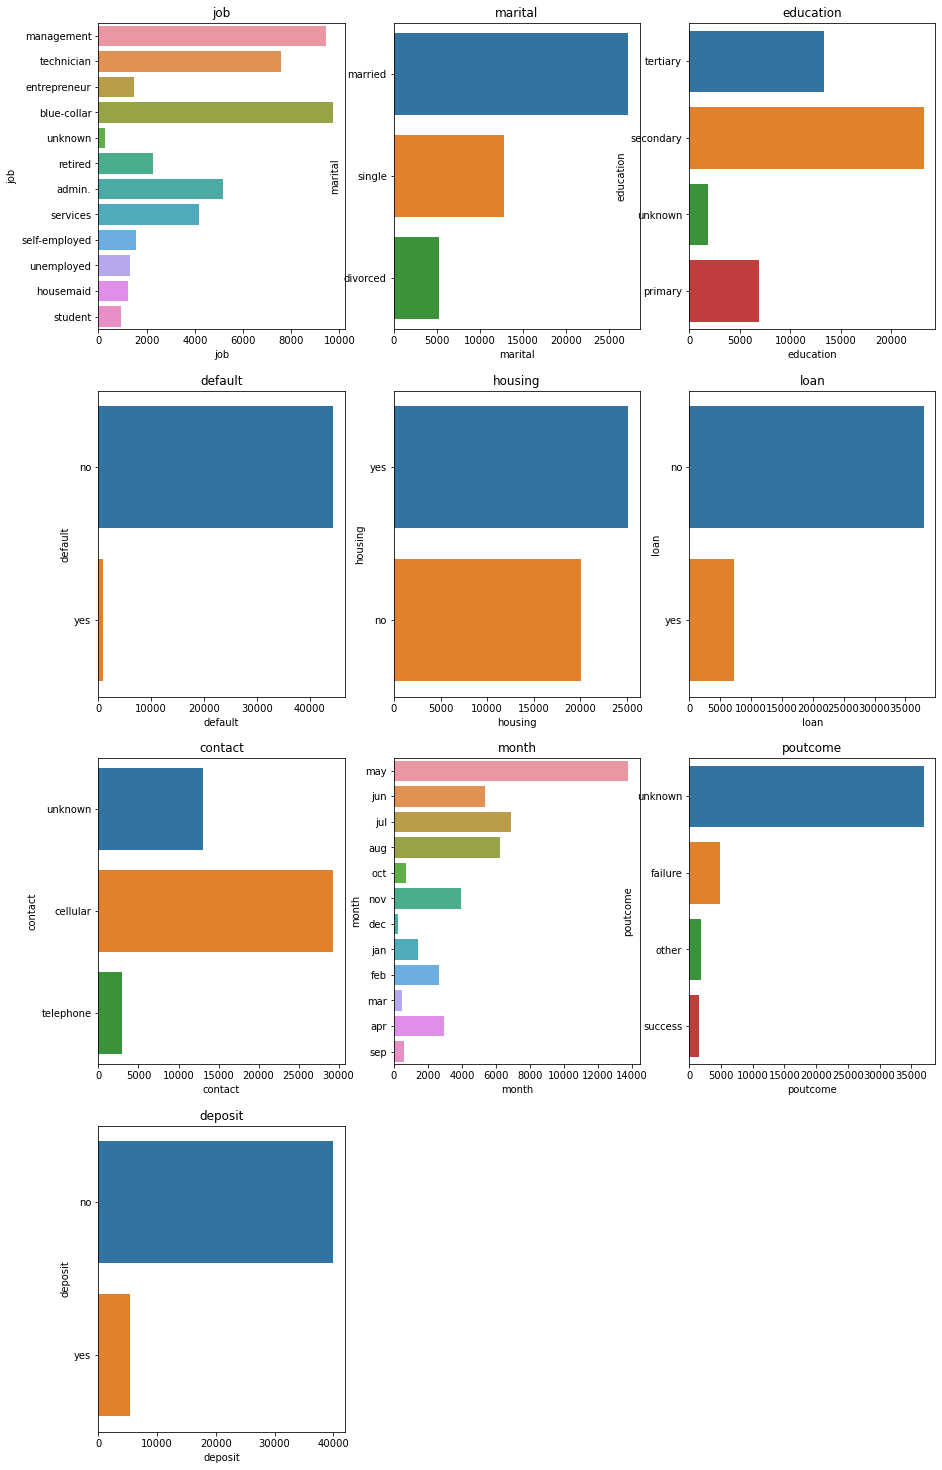

In [19]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1

for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=dataset)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1

plt.show() 


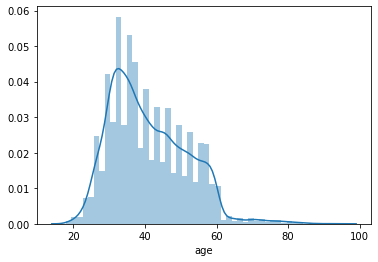

In [20]:
 ####Distribution of Continous Numerical Features

sns.distplot(dataset['age'])


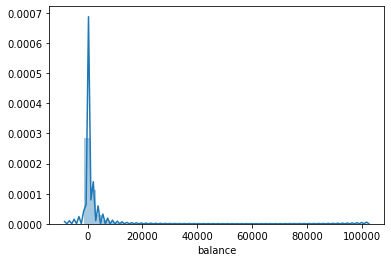

In [21]:
sns.distplot(dataset['balance'])


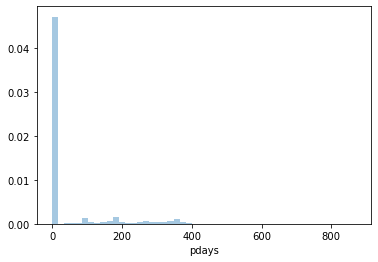

In [22]:
sns.distplot (dataset['pdays'])


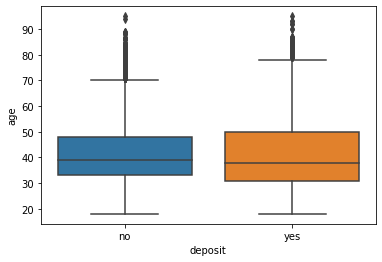

In [23]:
sns.boxplot(x=dataset["deposit"], y= dataset['age'], data=dataset)


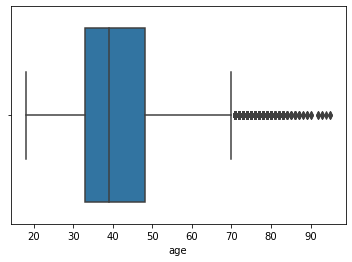

In [24]:
sns.boxplot(dataset['age'])


In [25]:
for categorical_feature in categorical_features:
    print(dataset.groupby(['deposit',categorical_feature]).size().sort_values(ascending= False))


deposit  job          
no       blue-collar      9024
         management       8157
         technician       6757
         admin.           4540
         services         3785
         retired          1748
         self-employed    1392
         entrepreneur     1364
yes      management       1301
no       housemaid        1131
         unemployed       1101
yes      technician        840
         blue-collar       708
no       student           669
yes      admin.            631
         retired           516
         services          369
         student           269
no       unknown           254
yes      unemployed        202
         self-employed     187
         entrepreneur      123
         housemaid         109
         unknown            34
dtype: int64
deposit  marital 
no       married     24459
         single      10878
         divorced     4585
yes      married      2755
         single       1912
         divorced      622
dtype: int64
deposit  education
no      

In [26]:
#CLEANING AND TRANSFORMING DATASET

(dataset.astype(np.object) == '?').any()
(dataset.astype(np.object) == 'NaN').any()
(dataset.astype(np.object) == 'NULL').any()


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [27]:
dataset.job.replace(['entrepreneur','self-employed'],'self-employed', inplace= True)
dataset.job.replace(['admin.','managment'],'management', inplace= True)
dataset.job.replace(['blue-collar','technician'],'blue-collar', inplace= True)
dataset.job.replace(['services','housemaid'],'services', inplace= True)
dataset.job.replace(['retired','unemployed'],'no_active_income', inplace= True)


In [28]:
for col in dataset.select_dtypes(include='object').columns:
    print(col)
    print(dataset[col].unique())


job
['management' 'blue-collar' 'self-employed' 'unknown' 'no_active_income'
 'services' 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


In [29]:
dataset.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [30]:
df=dataset.drop(['contact','duration','default', 'day'], axis=1)
df.head()
df.shape


(45211, 13)

In [31]:
#HOT ENCODING 

df["deposit"] = df["deposit"].map({"no":0,"yes":1})



In [32]:
def encode_string(cat_features):
    enc= preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features =enc.transform(cat_features)
    ohe =preprocessing.OneHotEncoder()
    encoded =ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()


In [33]:
categorical_columns = ['marital','education','housing','loan','month', 'poutcome']


In [34]:
f=encode_string(df['job'])


In [35]:
for col in categorical_columns:
    temp = encode_string(df[col])
    f = np.concatenate([f, temp], axis =1)

print(f.shape)
print(f[:2, :])


(45211, 34)
[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]]


In [36]:
numeric_features =np.array(dataset[['age','balance']])
features =np.concatenate([f,numeric_features],1)
print(features.shape)
Labels =np.array (df['deposit'])
print(Labels.shape)


(45211, 36)
(45211,)


In [38]:
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = .2)
X_train = features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])


In [39]:
scaler =preprocessing.StandardScaler().fit(X_train[:,12:])
X_train[:,12:] = scaler.transform(X_train[:,12:])
X_test[:,12:] = scaler.transform(X_test[:,12:])
X_train [:2,]


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        , -0.64886656, -0.20655762, -0.89484458,
         0.89484458,  0.43729381, -0.43729381,  3.79868847, -0.40191909,
        -0.06851697, -0.24946711, -0.18015817, -0.42107651, -0.36606884,
        -0.10290698, -0.66452084, -0.30919508, -0.12687697, -0.11362497,
         2.86491524, -0.20829775, -0.18691876, -2.10626316,  0.10267938,
        -0.52456473],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.54114891, -0.20655762,  1.11751249,
        -1.11751249,  0.43729381, -0.43729381, -0.26324875,  2.48806295,
        -0.06851697, -0.24946711, -0.18015817, -0.42107651, -0.36606884,
        -0.10290698, -0.66452084, -0.30919508, -0.12687697, -0.11362497,
        -0.34905047, -0.20829

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
lr = LogisticRegression(class_weight="balanced")


In [41]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits =10, shuffle = True)


In [42]:
nr.seed(3456)
param_grid = { "C": [.1, 1, 10 , 100, 1000]}


In [43]:
clf =ms.GridSearchCV(estimator = lr, param_grid =param_grid,
                     cv = inside,
                     scoring = 'roc_auc',
                     return_train_score =True)

clf.fit(features, Labels)
clf.best_estimator_.C


0.1

In [44]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, features, Labels, cv = outside)
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')

for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))


Mean performance metric = 0.735
SDT of the metric       = 0.014
Outcomes by cv fold
Fold  1    0.746
Fold  2    0.746
Fold  3    0.741
Fold  4    0.714
Fold  5    0.761
Fold  6    0.720
Fold  7    0.742
Fold  8    0.717
Fold  9    0.734
Fold 10    0.735


In [45]:
logistic_mod = linear_model.LogisticRegression(C = 0.1, class_weight = 'balanced') 
logistic_mod.fit(X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)


[-0.18766877]
[[-0.08216424 -0.02349489  0.35300835 -0.13745758 -0.18444551  0.4116211
  -0.33822424  0.0701238  -0.20299732  0.13171652 -0.12891767  0.07487786
   0.11258115  0.00942123  0.13731931 -0.13731931  0.07179147 -0.07179147
   0.16980014 -0.0803975   0.10463294  0.06226562 -0.06726777 -0.00226925
  -0.014937    0.19122198 -0.13808216 -0.04966485  0.17951755  0.15518902
  -0.04323009  0.02503809  0.39229456 -0.16105559 -0.01517131  0.08823295]]


In [46]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities [:15,:])


[[0.66432377 0.33567623]
 [0.62084545 0.37915455]
 [0.50328336 0.49671664]
 [0.64264509 0.35735491]
 [0.81769831 0.18230169]
 [0.59136108 0.40863892]
 [0.55045105 0.44954895]
 [0.64140563 0.35859437]
 [0.65738466 0.34261534]
 [0.44842263 0.55157737]
 [0.69440128 0.30559872]
 [0.48905898 0.51094102]
 [0.60941311 0.39058689]
 [0.22904166 0.77095834]
 [0.43284366 0.56715634]]


In [47]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

threshold = .51
scores = score_model(probabilities, threshold)
print(np.array(scores[:18]))
print(y_test[:18])

def print_metrics(Labels, scores, probabilities):
    metrics = sklm.precision_recall_fscore_support(Labels, scores)
    conf = sklm.confusion_matrix(Labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(Labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(Labels, probabilities[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, scores,probabilities)


[0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0]
[0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
                 Confusion matrix
                 Score positive    Score negative
Actual positive      6465              1530
Actual negative       477               571

Accuracy        0.78
AUC             0.73
Macro precision 0.60
Macro recall    0.68
 
           Positive      Negative
Num case     7995          1048
Precision    0.93          0.27
Recall       0.81          0.54
F1           0.87          0.36


In [48]:
features.shape


(45211, 36)

In [49]:
from sklearn.tree import DecisionTreeClassifier


In [50]:
param_grid ={"max_features" : [2, 3 , 5, 10, 13], "min_samples_leaf":[3,5,10,20]}
nr.seed(3456)
dt = DecisionTreeClassifier(class_weight = "balanced")
nr.seed(4455)

dt= ms.GridSearchCV(estimator = dt, param_grid =param_grid,
                                cv = inside, 
                                scoring = 'roc_auc', 
                                return_train_score =True)

dt.fit(features, Labels)
print(dt.best_estimator_.max_features)
print(dt.best_estimator_.min_samples_leaf)


10
20


In [51]:
nr.seed(1115)

dt_mod = DecisionTreeClassifier(class_weight ="balanced", 
                                max_features = dt.best_estimator_.max_features, 
                                min_samples_leaf = dt.best_estimator_.min_samples_leaf)


In [52]:
dt_mod.fit(X_train, y_train)
probabilities = dt_mod.predict_proba(X_test)
scores =score_model(probabilities, 0.54)
print_metrics(y_test,scores, probabilities)


                 Confusion matrix
                 Score positive    Score negative
Actual positive      6183              1812
Actual negative       435               613

Accuracy        0.75
AUC             0.72
Macro precision 0.59
Macro recall    0.68
 
           Positive      Negative
Num case     7995          1048
Precision    0.93          0.25
Recall       0.77          0.58
F1           0.85          0.35


In [53]:
from sklearn.ensemble import RandomForestClassifier


In [54]:
param_grid ={"max_features" : [2, 3 , 5, 10, 13], "min_samples_leaf":[3,5,10,20]}
nr.seed(3456)
rf = RandomForestClassifier(class_weight = "balanced")
nr.seed(4455)

rf= ms.GridSearchCV(estimator = rf, param_grid =param_grid,
                                cv = inside, 
                                scoring = 'roc_auc', 
                                return_train_score =True)

rf.fit(features, Labels)
print(rf.best_estimator_.max_features)
print(rf.best_estimator_.min_samples_leaf)


5
20


In [55]:
nr.seed(1115)

rf_mod = RandomForestClassifier(class_weight ="balanced", 
                                max_features = rf.best_estimator_.max_features, 
                                min_samples_leaf = rf.best_estimator_.min_samples_leaf)


In [56]:
rf_mod.fit(X_train, y_train)
probabilities = rf_mod.predict_proba(X_test)
scores =score_model(probabilities, 0.54)
print_metrics(y_test,scores, probabilities)


                 Confusion matrix
                 Score positive    Score negative
Actual positive      7115               880
Actual negative       513               535

Accuracy        0.85
AUC             0.75
Macro precision 0.66
Macro recall    0.70
 
           Positive      Negative
Num case     7995          1048
Precision    0.93          0.38
Recall       0.89          0.51
F1           0.91          0.43
